In [4]:
try(source("../startup.R"))

# Lecture 02: advanced options for ``ggplot``
In this notebook, we will cover:

* [Facets](#Facets)
* [Statistical Transformations](#Statistical-Transformations)
* [Position Adjustments](#Position-Adjustments)
* [Coordinate Systems](#Coordinate-Systems)


Let us start by revisiting the **mpg** data set that we saw in the last lecture.

In [5]:
options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)
print(mpg)

# A tibble: 234 x 11
   manufacturer      model displ  year   cyl      trans   drv   cty   hwy    fl
          <chr>      <chr> <dbl> <int> <int>      <chr> <chr> <int> <int> <chr>
 1         audi         a4   1.8  1999     4   auto(l5)     f    18    29     p
 2         audi         a4   1.8  1999     4 manual(m5)     f    21    29     p
 3         audi         a4   2.0  2008     4 manual(m6)     f    20    31     p
 4         audi         a4   2.0  2008     4   auto(av)     f    21    30     p
 5         audi         a4   2.8  1999     6   auto(l5)     f    16    26     p
 6         audi         a4   2.8  1999     6 manual(m5)     f    18    26     p
 7         audi         a4   3.1  2008     6   auto(av)     f    18    27     p
 8         audi a4 quattro   1.8  1999     4 manual(m5)     4    18    26     p
 9         audi a4 quattro   1.8  1999     4   auto(l5)     4    16    25     p
10         audi a4 quattro   2.0  2008     4 manual(m6)     4    20    28     p
# ... with 224 more

# Facets
We already saw how to add a third variable to a scatter plot by using a color aesthetics. **Facets** provide another way to add a third variable.

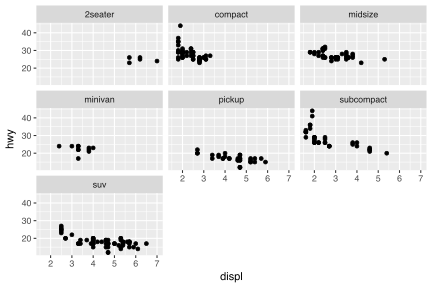

In [7]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class) # The ~ operator creates an R formula

The ``facet_wrap()`` command here told ggplot to generate a separate plot for each level of the discrete variable **class**. It also went ahead and arranged them into a nice 3x3 grid format.

The syntax to facet may look a little funny: 
```{r}
facet_wrap(~ class)
```
The tilde (``~``) at the beginning denotes what is called a **formula** in R. We will discuss formulas later in the class when we talk about modeling. For now, just keep in mind that the facet command must be written just so for things to work:

In [15]:
print(try(
  ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy)) + 
    facet_wrap(class))) # no ~ means error

[1] "Error in UseMethod(\"as.quoted\") : \n  no applicable method for 'as.quoted' applied to an object of class \"function\"\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in UseMethod("as.quoted"): no applicable method for 'as.quoted' applied to an object of class "function">


You should facet on a discrete variable. If you facet on a continuous variable, e.g., **cty**, R will discretize it first.

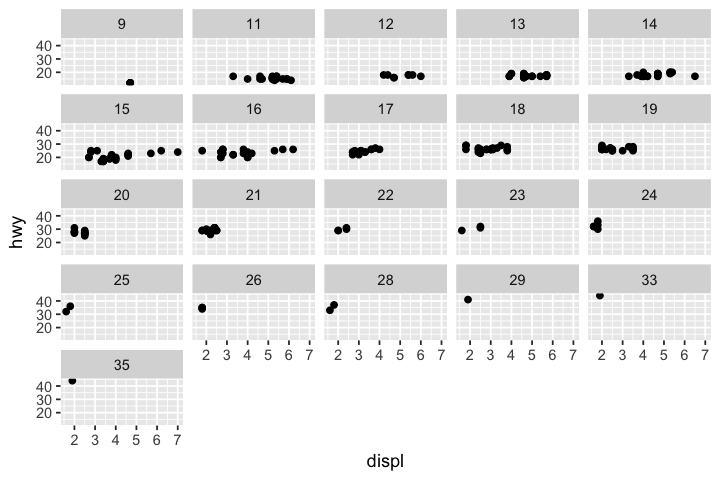

In [3]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ cty) 

You can facet on a combination of variables by modifying the formula to include more variables.

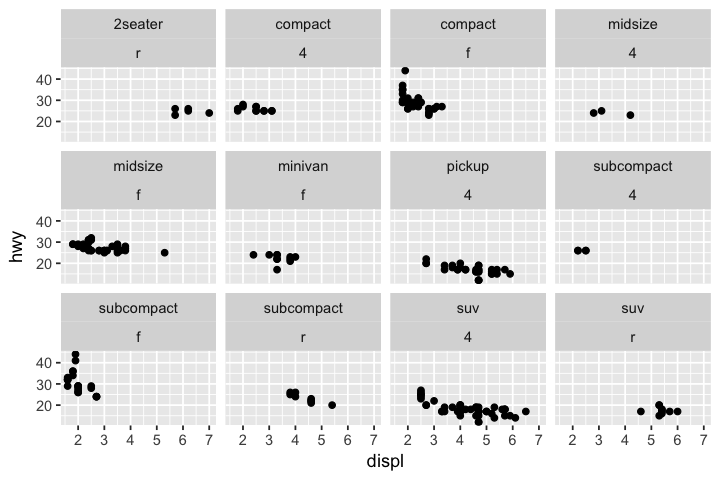

In [4]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class + drv) # The ~ operator creates an R formula

There is another way to facet on two variables: use a 2D grid. Now we make use of an expanded formula notation, by placing the variable we want faceted along the y-axis on the left hand side of the ``~`` and the horizontal faceting variable on the RHS of ``~``:

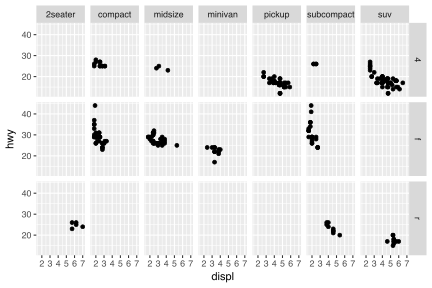

In [6]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ class) # Now we use a 2-sided formula of the form Y ~ X 

Here we used a different command called ``facet_grid()``. The difference between ``facet_grid()`` and ``facet_wrap()`` is that ``facet_grid`` places the plots on a grid according to the provided formula. ``facet_wrap`` stacks the variables and chooses its own grid:

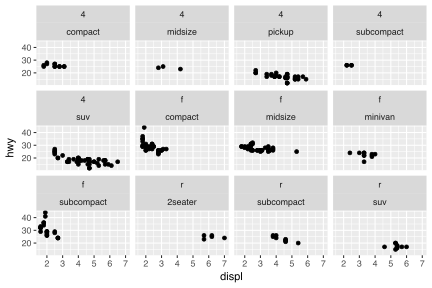

In [7]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(drv ~ class) # facet_wrap instead of facet_grid
# no different from facet_wrap(~ drv + class)

It is possible to leave out the Y axis or the X axis in `facet_grid` by replacing it with a ``.``.

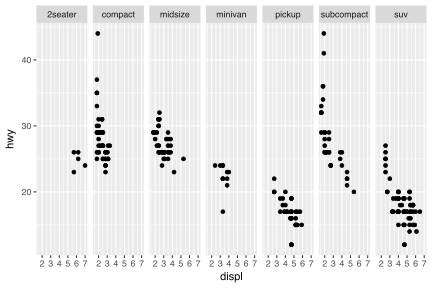

In [8]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(. ~ class) # No Y

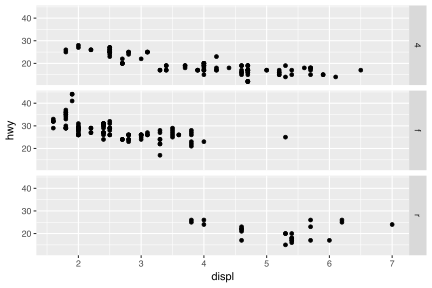

In [9]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ .) # No X

Note the difference between `facet_wrap(~ class)` and `facet_grid(. ~ class)`. The former will wrap a 1d grid over multiple rows whereas the latter will not wrap around. You can control the number of rows in `facet_wrap` using `nrow`. 

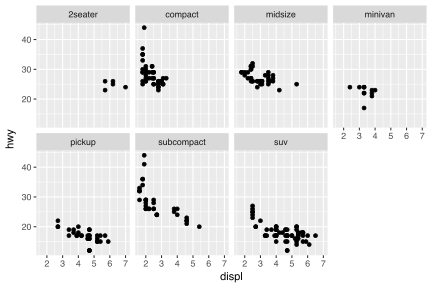

In [10]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2) # Use only 2 rows

# Statistical Transformations
Recall the **diamonds** data set.

In [13]:
print(diamonds)

# A tibble: 53,940 x 10
   carat       cut color clarity depth table price     x     y     z
   <dbl>     <ord> <ord>   <ord> <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23     Ideal     E     SI2  61.5    55   326  3.95  3.98  2.43
 2  0.21   Premium     E     SI1  59.8    61   326  3.89  3.84  2.31
 3  0.23      Good     E     VS1  56.9    65   327  4.05  4.07  2.31
 4  0.29   Premium     I     VS2  62.4    58   334  4.20  4.23  2.63
 5  0.31      Good     J     SI2  63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good     J    VVS2  62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good     I    VVS1  62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good     H     SI1  61.9    55   337  4.07  4.11  2.53
 9  0.22      Fair     E     VS2  65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good     H     VS1  59.4    61   338  4.00  4.05  2.39
# ... with 53,930 more rows


Let us create a **bar chart** using the **cut** variable. Recall that this is done by the ``geom_bar`` geometry.

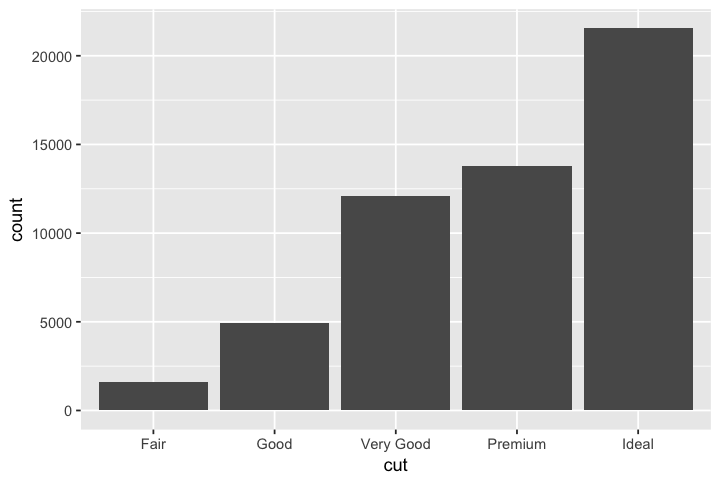

In [2]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

The `y` variable here, **count**, is not even a variable in our data set! What's going on? 🤔

So we see that a **bar chart** differs quite fundamentally from a **scatter plot**. A scatter plot uses the raw data variables directly. A bar chart applies a **statistical transformation** (`stat_count` in our case) to create the counts and then plots the counts vs the raw variable (`cut` in our case).

How do we know that `geom_bar` uses `stat_count` as the default transformation? You can type `?geom_bar` in RStudio or consult the [online documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).

Geoemetries and Statistical transformations comes in pairs. E.g.,

* `geom_point` and `"identity"`
* `geom_smooth` and `stat_smooth`
* `geom_bar` and `stat_count`

An example of a situation when you might want to override the default transformation is the following.

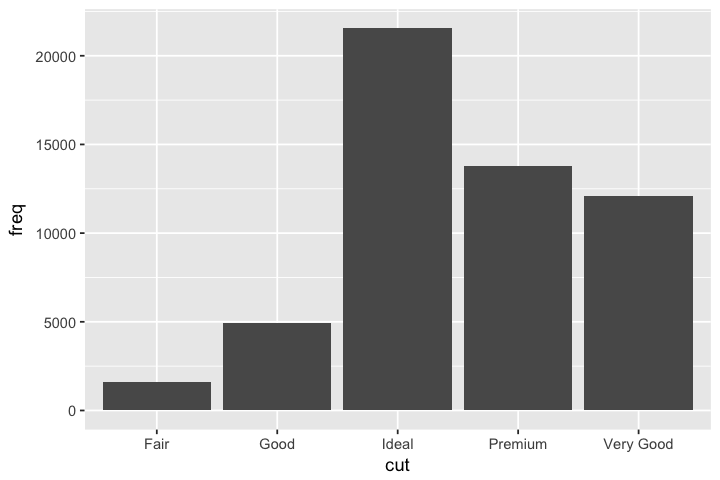

In [2]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)

ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

`geom_col` is used when you wants the bar heights to represent values in the data. E.g., the plot below shows the total **price** (in millions of dollars) of the diamonds in each **cut** category.

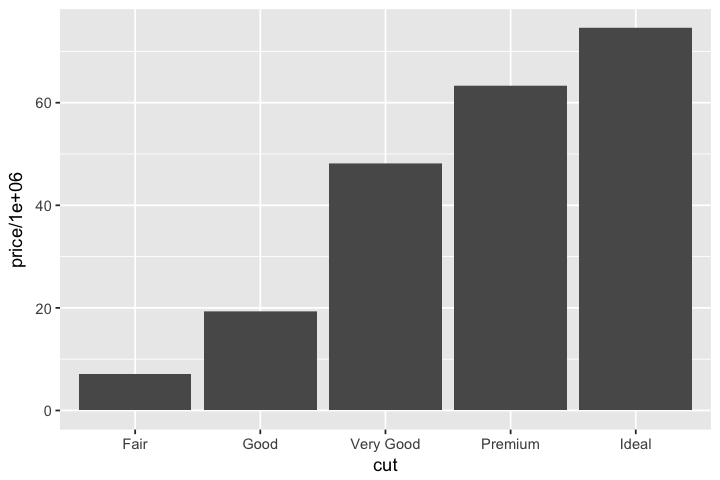

In [4]:
ggplot(data = diamonds) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

There are a lot of transformations that `geom_bar` is doing internally to create the plot above. E.g., one way to generate the plot by doing explicit data transformations is as follows. Don't worry about the details; we will cover data transformations (like `select`, `group_by`, `summarise`) later.

In [5]:
(my_tibble <- select(diamonds, cut, price) %>%
    group_by(cut) %>%
    summarise(total_price_millions = sum(price)/1e6))

cut,total_price_millions
Fair,7.01760
Good,19.27501
Very Good,48.10762
Premium,63.22150
Ideal,74.51349


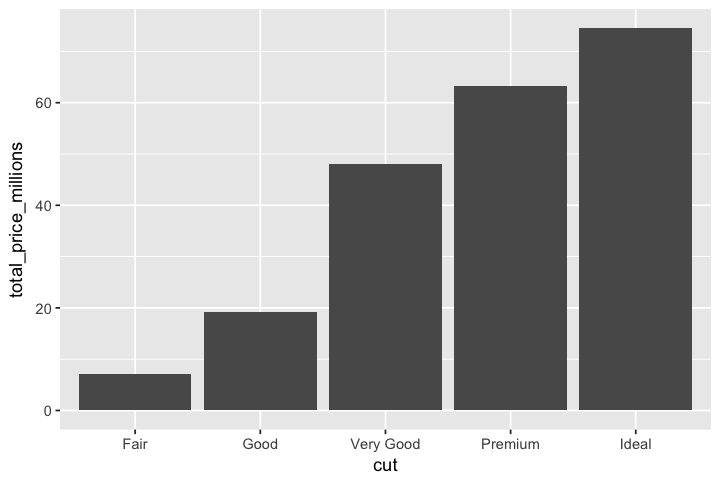

In [6]:
ggplot(data = my_tibble) +
    geom_bar(mapping = aes(x = cut, y = total_price_millions), stat = "identity")

## Position Adjustments
Let us see what happens when we map the **color** aesthetic to the **cut** variable.

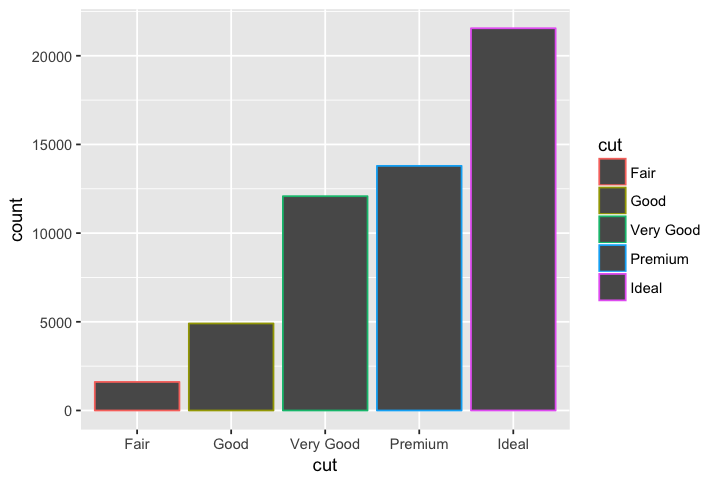

In [3]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, color = cut))

It just changed the boundary color. Using the **fill** aesthetic might be better.

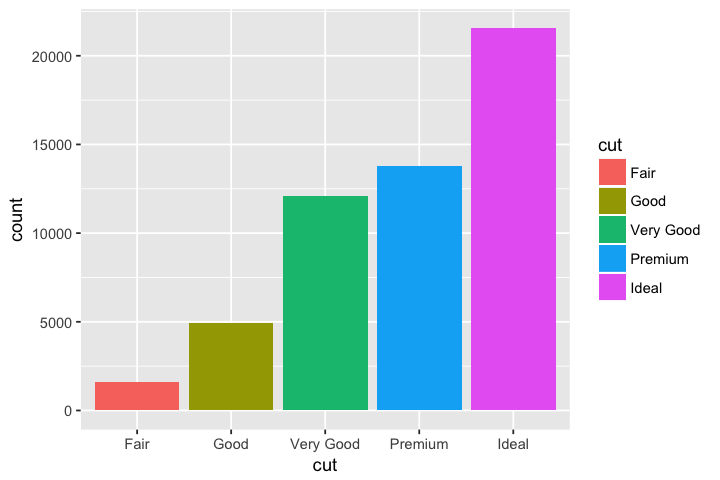

In [8]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut))

What happens when we map the `fill` aesthetic to some variable other than **cut**, say **clarity**?

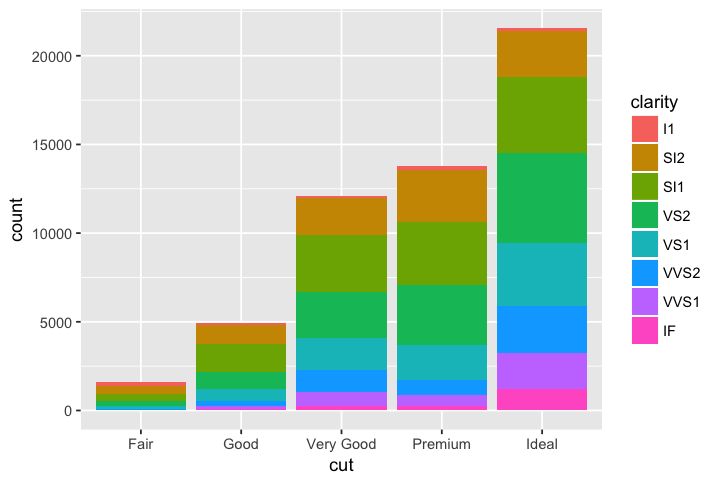

In [9]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity))

If stacking is not the behavior you want, you can set the **position** argument to something other than `"stack"`.

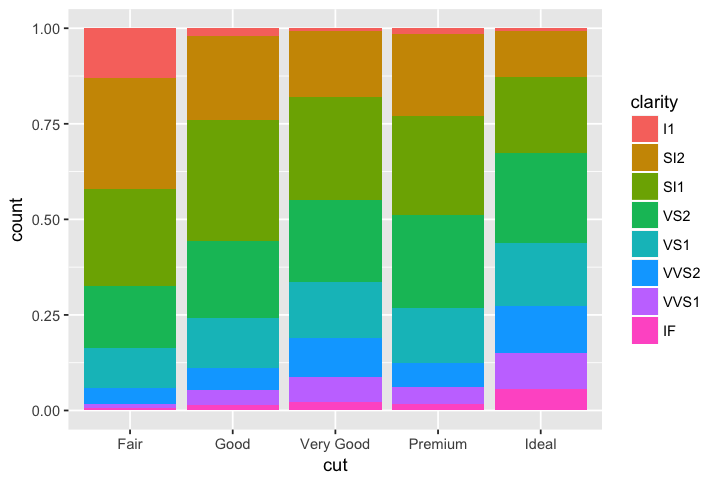

In [10]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill") # stacks but shows proportions

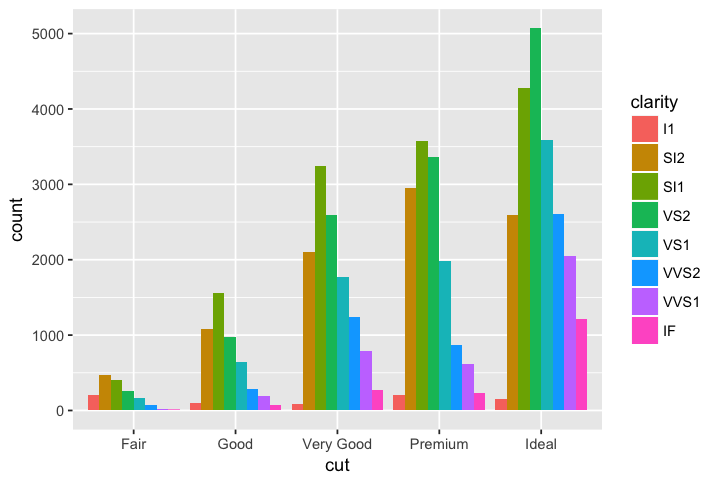

In [11]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") # put the bars side by side

There is a position adjustment that is less useful in bar plots but can be useful in scatter plots.

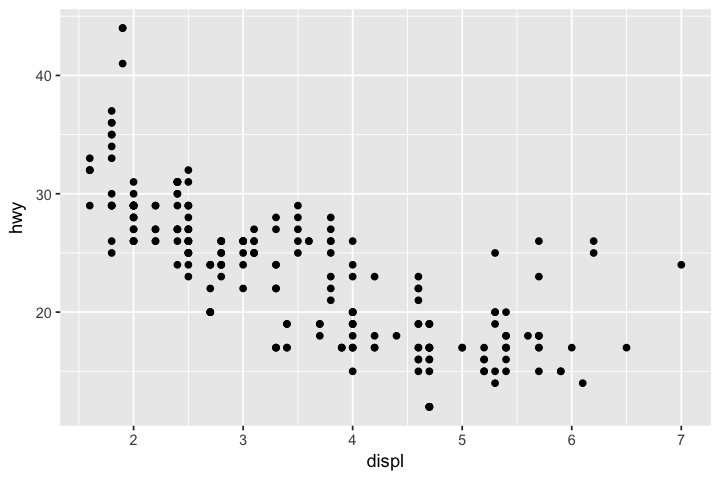

In [12]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

It's hard to notice but there are overlapping points in the plot above. For example, the lowest point (point with the lowest `hwy` value) actually consists of 5 overlapping points: 2 SUVs and 3 pickup trucks.

In [13]:
filter(mpg, hwy == 12)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


Let's see if the overlapping points show up when we use the **jitter** position adjustment in a normal scatter plot.

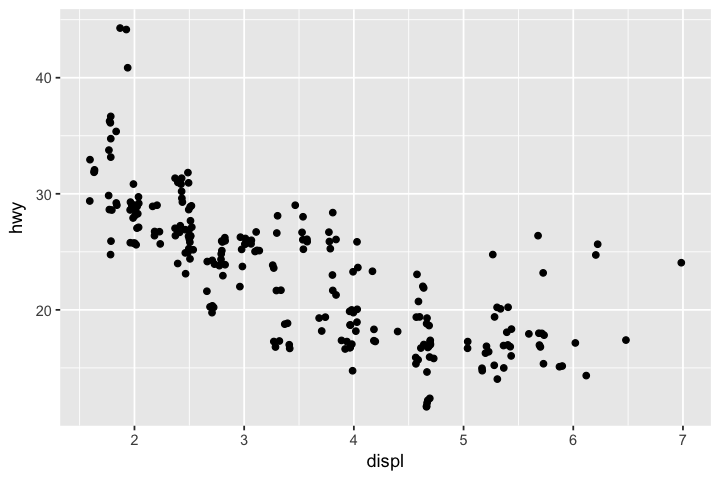

In [14]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

In [15]:
filter(mpg, hwy < 13)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


`geom_jitter` is just a shorthand for `geom_point(position = "jitter")`

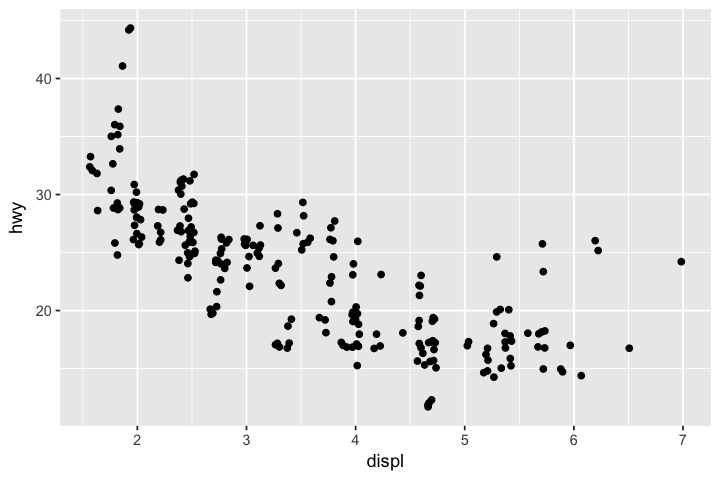

In [16]:
ggplot(data = mpg) +
    geom_jitter(mapping = aes(x = displ, y = hwy))

# Coordinate Systems

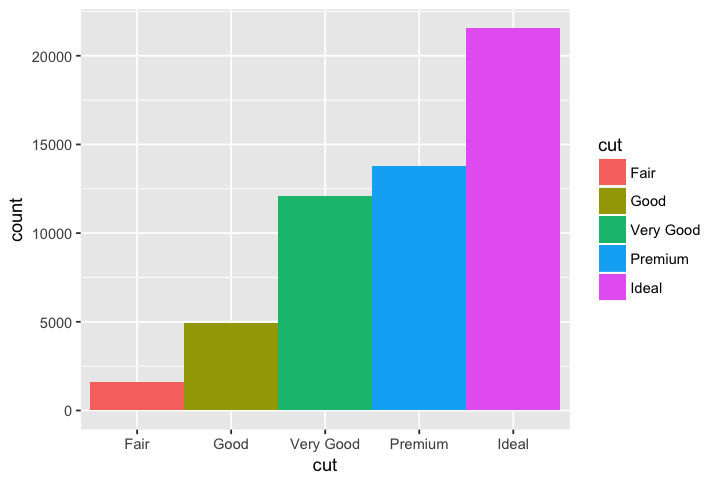

In [17]:
(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut), width = 1)) # set width so that the bars touch

Now let us change to polar coordinates to get a **Coxcomb chart**.

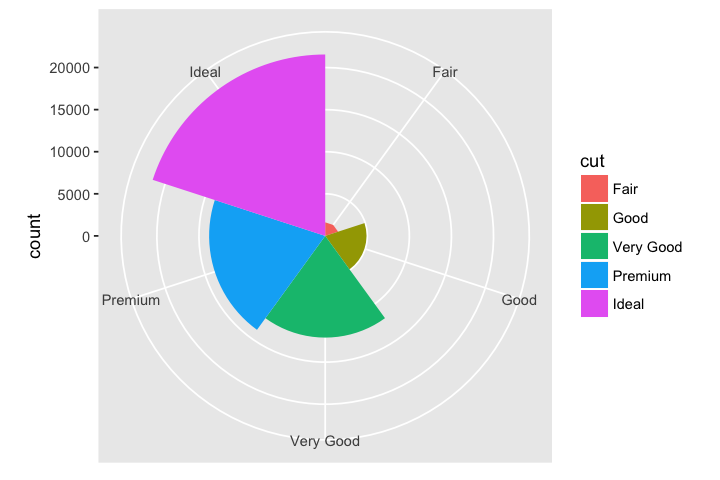

In [18]:
bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a Coxcomb chart

To get a **pie chart**, we have to create a **stacked bar chart** first

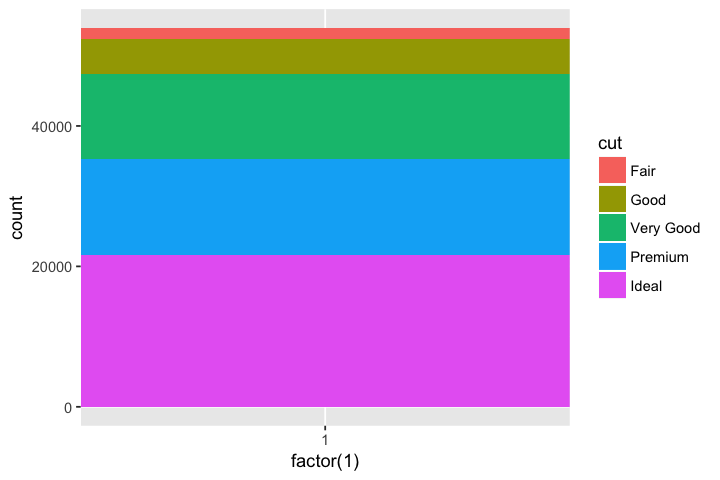

In [19]:
(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = factor(1), fill = cut), width = 1)) # set width so that the bars touch

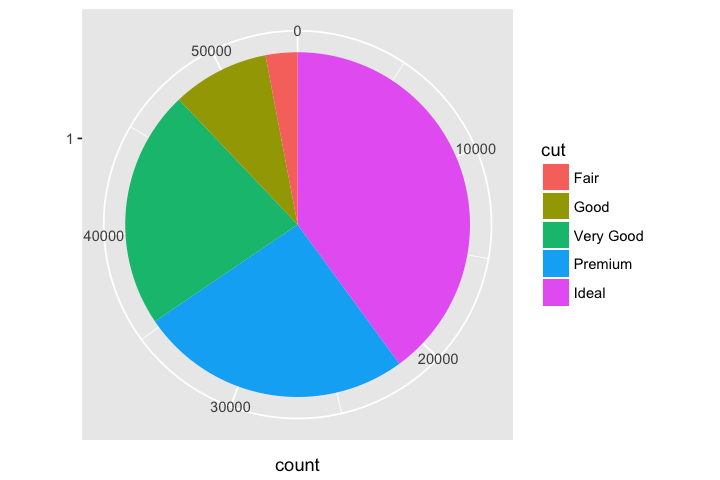

In [20]:
bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar(theta = "y") # change to polar coordinates to get a pie chart

Notice that we mapped the Y axis of the bar chart to the angle **theta**. By default, it will map to the radial coordinate giving us a **bullseye chart**.

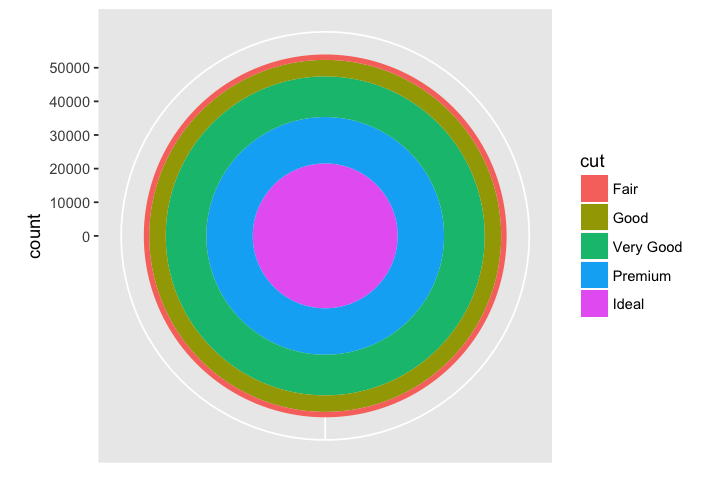

In [21]:
bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a pie chart

Now you have learned about all elements of the following ggplot template:

```r
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

In [ ]:
In this notebook, we will cover:

* [Statistical Transformations](#Statistical-Transformations)
* [Position Adjustments](#Position-Adjustments)
* [Coordinate Systems](#Coordinate-Systems)

# Statistical Transformations

Recall the **diamonds** data set.

options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)
print(diamonds)

Let us create a **bar chart** using the **cut** variable. This is done by the ``geom_bar`` geometry.

ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

The `y` variable here, **count**, is not even a variable in our data set! What's going on? 🤔

So we see that a **bar chart** differs quite fundamentally from a **scatter plot**. A scatter plot uses the raw data variables directly. A bar chart applies a **statistical transformation** (`stat_count` in our case) to create the counts and then plots the counts vs the raw variable (`cut` in our case).

How do we know that `geom_bar` uses `stat_count` as the default transformation? You can type `?geom_bar` in RStudio or consult the [online documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).

Geoemtries and Statistical Transformations comes in pairs. E.g.,

* `geom_point` and `"identity"`
* `geom_smooth` and `stat_smooth`
* `geom_bar` and `stat_count`

An example of a situation when you might want to override the default transformation is the following.

demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)

ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

`geom_col` is used when you wants the bar heights to represent values in the data. E.g., the plot below shows the total **price** (in millions of dollars) of the diamonds in each **cut** category.

ggplot(data = diamonds) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

There are a lot of transformations that `geom_bar` is doing internally to create the plot above. E.g., one way to generate the plot by doing explicit data transformations is as follows. Don't worry about the details; we will cover data transformations (like `select`, `group_by`, `summarise`) later.

(my_tibble <- select(diamonds, cut, price) %>%
    group_by(cut) %>%
    summarise(total_price_millions = sum(price)/1e6))

ggplot(data = my_tibble) +
    geom_bar(mapping = aes(x = cut, y = total_price_millions), stat = "identity")

# Position Adjustments

Let us see what happens when we map the **color** aesthetic to the **cut** variable.

ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, color = cut))

It just changed the boundary color. Using the **fill** aesthetic might be better.

ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut))

What happens when we map the `fill` aesthetic to some variable other than **cut**, say **clarity**?

ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity))

If stacking is not the behavior you want, you can set the **position** argument to something other than `"stack"`.

ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill") # stacks but shows proportions

ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") # put the bars side by side

There is a position adjustment that is less useful in bar plots but can be useful in scatter plots.

ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

It's hard to notice but there are overlapping points in the plot above. For example, the lowest point (point with the lowest `hwy` value) actually consists of 5 overlapping points: 2 SUVs and 3 pickup trucks.

filter(mpg, hwy == 12)

Let's see if the overlapping points show up when we use the **jitter** position adjustment in a normal scatter plot.

ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

filter(mpg, hwy < 13)

`geom_jitter` is just a shorthand for `geom_point(position = "jitter")`

ggplot(data = mpg) +
    geom_jitter(mapping = aes(x = displ, y = hwy))

# Coordinate Systems

(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut), width = 1)) # set width so that the bars touch

Now let us change to polar coordinates to get a **Coxcomb chart**.

bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a Coxcomb chart

To get a **pie chart**, we have to create a **stacked bar chart** first

(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = factor(1), fill = cut), width = 1)) # set width so that the bars touch

bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar(theta = "y") # change to polar coordinates to get a pie chart

Notice that we mapped the Y axis of the bar chart to the angle **theta**. By default, it will map to the radial coordinate giving us a **bullseye chart**.

bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a pie chart

Now you have learned about all elements of the following ggplot template:

```r
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```